## Exploratory Data Analysis on Zomato's Data

### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading and reading the dataset:

In [2]:
zomato_data = pd.read_csv('zomato.csv')
zomato_data.head()        

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato_data.shape   # There are 51717 rows and 17 columns.

(51717, 17)

In [4]:
# columns present in the dataset.

print(f"Number of columns: {len(zomato_data.columns)}")

for i in zomato_data.columns:
    print(i)

Number of columns: 17
url
address
name
online_order
book_table
rate
votes
phone
location
rest_type
dish_liked
cuisines
approx_cost(for two people)
reviews_list
menu_item
listed_in(type)
listed_in(city)


In [5]:
# Looking at the some information about the dataset.

zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
# To see the statistical information about numerical columns only.

zomato_data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
# Deleting the unnecessary columns.

zomato_data = zomato_data.drop(['url','dish_liked','phone'], axis = 1)

print(f"Number of columns after deleting: {len(zomato_data.columns)}")

Number of columns after deleting: 14


In [8]:
# Removing the duplicate values/records.

duplicate_rows = zomato_data[zomato_data.duplicated()]
duplicate_rows

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
596,"572, 30th Main, 3rd Stage, Banashankari, Banga...",My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
7599,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield
9464,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9/5,201,BTM,Quick Bites,"North Indian, Street Food",300,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
9466,"607, First Floor, 80 Feet Road, 6th Block, Kor...",Carrots,Yes,Yes,4.1/5,600,Koramangala 6th Block,Casual Dining,"Italian, North Indian, Healthy Food, Desserts","1,100","[('Rated 5.0', ""RATED\n It's the first vegan ...",[],Delivery,BTM
9467,"Building 58, New 3, A Main Road Marenahalli, J...",Eatsomnia,Yes,No,NEW,0,JP Nagar,Delivery,"North Indian, South Indian, Chinese, Continental",500,"[('Rated 1.0', ""RATED\n The worst food I ate ...",[],Delivery,BTM
9468,"6th Cross Road, Koramangala 6th Block, Bangalore",Rolls & Co,Yes,No,3.9/5,213,Koramangala 6th Block,Quick Bites,"Burger, Beverages, Rolls",400,"[('Rated 2.0', 'RATED\n Order : Peri Peri Fri...",[],Delivery,BTM
9469,"10, Opposite Forum Mall, Taverekere, Suddagunt...",Fogg,No,Yes,NEW,0,BTM,Quick Bites,"Fast Food, Chinese",200,"[('Rated 5.0', 'RATED\n Seafood soup - A Thai...",[],Delivery,BTM
9470,"Koramangala 1st Block, Bangalore",The Paratha Stories,Yes,No,3.3/5,36,Koramangala 1st Block,Delivery,North Indian,400,"[('Rated 3.0', 'RATED\n There is enough scope...",[],Delivery,BTM
9471,"29, 7th Cross Road, Bhavani Nagar, Suddagunte ...",Mycakeshop,Yes,No,NaN,0,BTM,Bakery,"Bakery, Desserts",300,"[('Rated 5.0', 'RATED\n I loved cake nice tru...","['Red Velvet Cake', 'Truffle Chocolate Cake', ...",Delivery,BTM
9549,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani,No,No,3.5/5,11,BTM,Quick Bites,"Biryani, Fast Food",300,"[('Rated 4.0', 'RATED\n Very delicious food @...",[],Delivery,BTM


In [9]:
len(duplicate_rows)

43

In [10]:
zomato_data.drop_duplicates(inplace = True)
zomato_data.duplicated().sum()

0

In [11]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

## Handling missing values:

1. isnull() or isna(): To check the null values present in column or not.


2. dropna(how = 'any', inplace = True): It will remove all the rows which contains the null values.


3. df.fillna(): It is used to replace null values with any other specified value.

* df.fillna( method ='ffill', inplace = True): is used to forward fill the missing values in the dataset.

* df.fillna( method ='bfill', inplace = True): is used to backward fill the missing values in the dataset.

* fillna(data['quantity'].mean()): is used to fill the missing values with mean/median/mode in the dataset.


4. df.replace(to_replace = np.nan, value =-99999): Used to replace one value with another.

In [12]:
# To check the null values in each columns.

zomato_data.isnull().sum().sort_values(ascending = False)

rate                           7767
approx_cost(for two people)     345
rest_type                       227
cuisines                         45
location                         21
address                           0
name                              0
online_order                      0
book_table                        0
votes                             0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [13]:
# Removing NULL values from the dataset.

zomato_data.dropna(how="any",inplace = True)
zomato_data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [14]:
len(zomato_data)   # After removing the null values, dataset contains 41302 records.

43499

In [15]:
# Changing/Renaming the column names for better understanding.

zomato_data = zomato_data.rename(columns = {'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 
                                            'listed_in(city)':'city'})
zomato_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [16]:
# Some transformation

zomato_data['cost'] = zomato_data['cost'].apply(lambda x: x.replace(',','.'))
zomato_data['cost'][40:80]

40      200
41      300
42      500
43      800
44      600
45      400
46      300
47      450
48      850
49      300
50      450
51      150
52      400
53      750
54      450
55      450
56      300
57      800
58      200
59      400
60      800
61      800
62      150
63      850
64      150
65      400
66      100
67    1.200
68      300
69      600
70      500
71      300
72      150
73      700
74      300
75      500
76      150
77      300
78      500
79      350
Name: cost, dtype: object

In [17]:
# Changing the datatype of cost into float

zomato_data['cost'] = zomato_data['cost'].astype('float')
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [18]:
# Reading the ratings from dataset

zomato_data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
# Removing the unwanted data from rate column.

a = zomato_data[zomato_data['rate'] == 'NEW']

b = zomato_data[zomato_data['rate'] == '-']

zomato_data.drop(zomato_data.index[zomato_data['rate'] == 'NEW'], inplace = True)
zomato_data.drop(zomato_data.index[zomato_data['rate'] == '-'], inplace = True)

In [20]:
zomato_data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
zomato_data['rate'] = zomato_data['rate'].apply(lambda x: x.replace('/5',''))
zomato_data['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rate, Length: 41237, dtype: object

In [22]:
# Converting datatype from string to float

print(f"Before converting the datatype: {zomato_data['rate'].dtypes}")

zomato_data['rate'] = zomato_data['rate'].astype('float')
print(f"After converting the datatype: {zomato_data['rate'].dtypes}")

Before converting the datatype: object
After converting the datatype: float64


In [23]:
zomato_data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

##  Remove all the outliers if exists in the dataset:

In [24]:
zomato_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<AxesSubplot:xlabel='cost'>

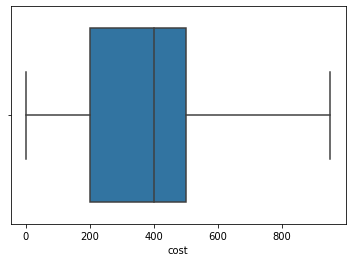

In [25]:
# Detecting outliers with the help of boxplot

sns.boxplot(zomato_data.cost)     # for 'cost' column

#### For cost column, there are no any outliers present.

<AxesSubplot:xlabel='rate'>

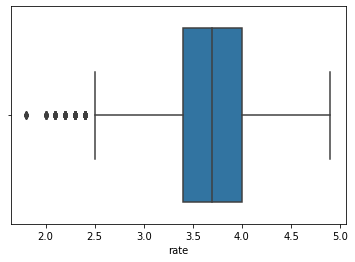

In [26]:
sns.boxplot(zomato_data.rate)   # for 'rate' column

### Now, calculate the 5 number summary for the columns:

1) min

2) 25%

3) median

4) 75%

5) max

In [27]:
print(f"Minimum value for rate is: {zomato_data['rate'].min()}")

print(f"25%(Q1) value for rate is: {zomato_data['rate'].quantile(0.25)}")

print(f"Median value for rate is: {zomato_data['rate'].median()}")

print(f"75%(Q3) value for rate is: {zomato_data['rate'].quantile(0.75)}")

print(f"Maximum value for rate is: {zomato_data['rate'].max()}")

Minimum value for rate is: 1.8
25%(Q1) value for rate is: 3.4
Median value for rate is: 3.7
75%(Q3) value for rate is: 4.0
Maximum value for rate is: 4.9


### Finding IQR (Inter Quartile Range) i.e Q3(75% of your data) - Q1(25% of your data)

In [28]:
Q1 = zomato_data['rate'].quantile(0.25)
print(f"Q1: {Q1}")

Q3 = zomato_data['rate'].quantile(0.75)
print(f"Q3: {Q3}")

IQR = Q3 - Q1         
print(f"IQR: {IQR}")

Q1: 3.4
Q3: 4.0
IQR: 0.6000000000000001


In [29]:
# Find out the lower and hight limit from the range

# [Lower limit................Higher limit]

# Lower limit: Q1 - 1.5 * IQR
# Higher limit: Q3 + 1.5 * IQR

Lower_limit = Q1 - 1.5 * IQR
print(f"Lower limit for rate column: {Lower_limit}")

Higher_limit = Q1 + 1.5 * IQR
print(f"Lower limit for rate column: {Higher_limit}")

Lower limit for rate column: 2.5
Lower limit for rate column: 4.3


In [30]:
# Here, we are finding the outliers for rate column which includes values less than Lower limit and greater than Higher limit.

outliers = zomato_data[(zomato_data.rate < Lower_limit) | (zomato_data.rate > Higher_limit)]
outliers

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
38,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"North Indian, Mughlai, South Indian, Chinese",750.0,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari
44,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Delivery,Banashankari
86,"52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...",Meghana Foods,Yes,No,4.4,4401,Jayanagar,Casual Dining,"Biryani, North Indian, Chinese",600.0,"[('Rated 2.0', 'RATED\n Meghana foods!!! The ...",[],Delivery,Banashankari
164,"615/1, Ground Floor, Janardhan Mansion, 10th C...",The Blue Wagon - Kitchen,Yes,No,4.6,228,Jayanagar,Cafe,"Cafe, Beverages",400.0,"[('Rated 5.0', ""RATED\n I've been binging on ...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51682,"HVP Crest, ITPL Main Road, Whitefield, Bangalore",The Pallet,No,Yes,4.5,2745,Whitefield,"Microbrewery, Pub","Continental, Mediterranean, Italian, North Ind...",1.6,"[('Rated 2.0', 'RATED\n We visited this place...",[],Pubs and bars,Whitefield
51685,"2, Doddanekkundi, Whitefield Road, Mahadevpura...",Biergarten,No,Yes,4.7,7064,Whitefield,"Microbrewery, Pub","Continental, European, BBQ, Chinese, Asian",2.4,"[('Rated 3.0', 'RATED\n We had been here on a...",[],Pubs and bars,Whitefield
51686,"331, Road 5B, EPIP Area, Next to KTPO, Whitefi...",Windmills Craftworks,No,No,4.6,5954,Whitefield,"Microbrewery, Pub","American, North Indian, Salad",2.5,"[('Rated 5.0', ""RATED\n A review for Windmill...",[],Pubs and bars,Whitefield
51687,"4th Floor, Uptown Square, Seegehalli, Near All...",Red Rhino,Yes,Yes,4.4,1980,Whitefield,"Microbrewery, Pub","Continental, Mediterranean, South Indian, Nort...",1.7,"[('Rated 4.0', 'RATED\n Red Rhino is a Brewer...","['Hangover', 'Smoking Hot Red Rhino Chilli Chi...",Pubs and bars,Whitefield


In [31]:
len(outliers)   # We can see that there are 2570 values are outliers present in the dataset.

2573

In [32]:
# Here we got the values except the outiers

zomato_data[(zomato_data.rate > Lower_limit) & (zomato_data.rate < Higher_limit)]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Finger Food,2.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Chinese, Continental, North Indian",1.2,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield


## Use Encoding and encode the categorical data:

* Data transformation is a process of converting data from one format to another.


* Data which is provided to us contains different datatypes. So, for converting character data (categorical data) into numeric data we do encoding.


* There are three methods in Data Transformation:
1. LabelEncoder

2. OneHotEncoder

3. Pandas dummy variable

In [33]:
zomato_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### We need to encode 'online_order' and 'book_table' columns.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
col = ['online_order', 'book_table']
zomato_data[col] = zomato_data[col].apply(le.fit_transform)

In [36]:
zomato_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Here we can see that values are changed from Yes and No to 1 and 0 respectively.

In [37]:
zomato_data['cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [38]:
zomato_data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [39]:
zomato_data['location'].value_counts()

BTM                      3873
Koramangala 5th Block    2296
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

## Handle the Skewness if exists in the dataset:

* The shape describe type of graph.


* The shape of the data is important because, making a decision of probability of data is based on its type.


* The shape of data can be measured using following methodology:

**1. Symmetric**

**2. Skewness**

**3. Kurtosis**

### 1. Symmetric:

* In the symmetric shape of the graph, the data is distributed the same on both the side.


* It is symmetric bell shaped. The curve formed by the symmetric graph is called normal curve.

### Skewness:

* Skewness is the measure of the asymmetry of the distribution of the data.

* The data is asymmetrical i.e., it is skewed towards one side.



* Skewness is classified into two types:

**1. Positively skewed:**
* In a positively skewed distribution, the data values are clustered around left side of the distribution and tail is on right side.


**2. Negatively skewed:**
* In a negatively skewed distribution, the data values are clustered around right side of the distribution and tail is on left side.

In [40]:
from scipy.stats import skew

In [41]:
zomato_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Skewness of rate is: -0.3279219103187245


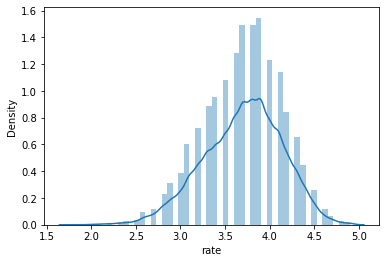

Skewness of cost is: 0.15268511600066154


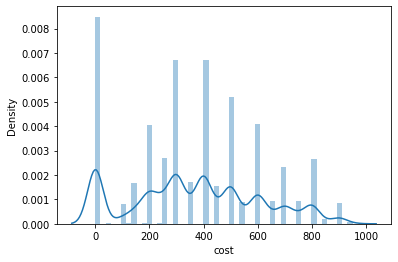

In [42]:
col = zomato_data[['rate', 'cost']]

for i in col:
    print(f"Skewness of {i} is: {skew(zomato_data[i])}")
    sns.distplot(col[i])
    plt.show()

<AxesSubplot:>

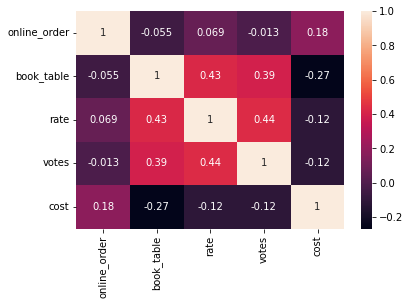

In [43]:
sns.heatmap(zomato_data.corr(), annot = True)

* Remove the skewness for only those columns where correlation with target is not that great.


* So, here we can see that rate column where the correlation value is not good.


* Now, remove the skewness from this columns.


* If we apply log or sqrt function on -ve values then it will gives us NULL value.

In [44]:
zomato_data['rate'] = np.log(zomato_data['rate'])
print(f"Skewness of rate column is: {skew(zomato_data['rate'])}")

Skewness of rate column is: -0.7140028543825043


## Normalization:

* Here, we are using MinMaxScaler, It is a standardization process in which the feature values lies between 0 and 1.

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
zomato_data[['votes','cost']]

,votes,cost
0,775,800.0
1,787,800.0
2,918,800.0
3,88,300.0
4,166,600.0
...,...,...
51709,34,800.0
51711,81,800.0
51712,27,1.5
51715,236,2.5


In [47]:
mn = MinMaxScaler()
zomato_data[['votes','cost']] = mn.fit_transform(zomato_data[['votes','cost']])

In [48]:
zomato_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,1.410987,0.046043,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",0.841939,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,1.410987,0.046756,Banashankari,Casual Dining,"Chinese, North Indian, Thai",0.841939,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,1.335001,0.054539,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",0.841939,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,1.308333,0.005228,Banashankari,Quick Bites,"South Indian, North Indian",0.315068,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,1.335001,0.009862,Basavanagudi,Casual Dining,"North Indian, Rajasthani",0.631191,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


* Here, we can see that the columns votes, cost are normalized i.e values are lies in between 0 and 1.

In [49]:
# we can check the maximum and minimum value for these columns which is 1 and 0 respectively.
# So, all the values are lies in between 0 and 1.

print(zomato_data[['votes','cost']].min())

votes    0.0
cost     0.0
dtype: float64


In [50]:
print(zomato_data[['votes','cost']].max())

votes    1.0
cost     1.0
dtype: float64


## Pandas profiling:

* The pandas_profiling library in python includes a method named ProfileReport() which generate a basic report on the input DataFrame.

In [51]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\nikit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [52]:
import pandas_profiling as pp

In [53]:
'''
profile = pp.ProfileReport(zomato_data)
profile.to_file("Report.html")
'''

'\nprofile = pp.ProfileReport(zomato_data)\nprofile.to_file("Report.html")\n'

## Data Visualization:

Text(0.5, 1.0, 'Restaurants delovering online or not')

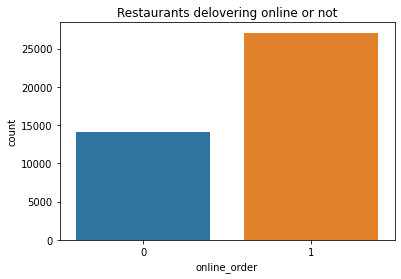

In [54]:
# Restaurants delivering online or not.

sns.countplot(zomato_data['online_order'])
plt.title("Restaurants delovering online or not")

1 means Restaurants delivering the food online and similarly, 0 means Restaurants are not delivering the food online.

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

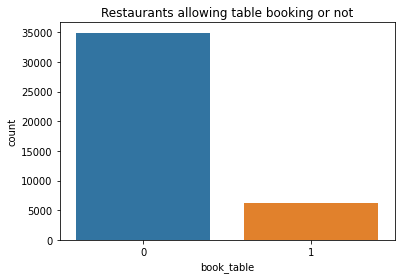

In [55]:
# Restaurants allowing table booking or not.

sns.countplot(zomato_data['book_table'])
plt.title("Restaurants allowing table booking or not")

Here, we can see that most of the restaurants are not allowing table booking.

### Table booking rate vs rate:

Text(0.5, 1.0, 'Table booking rate vs rate')

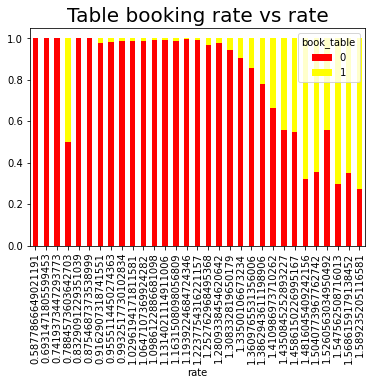

In [56]:
a = pd.crosstab(zomato_data['rate'], zomato_data['book_table'])
a.div(a.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['red','yellow'])
plt.title("Table booking rate vs rate", fontsize = 20)

### Location:

In [57]:
zomato_data['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [58]:
zomato_data['city'].value_counts()

BTM                      2580
Koramangala 7th Block    2361
Koramangala 4th Block    2254
Koramangala 5th Block    2250
Koramangala 6th Block    2121
Jayanagar                1915
JP Nagar                 1633
Indiranagar              1537
Church Street            1512
MG Road                  1510
Brigade Road             1483
Lavelle Road             1449
Residency Road           1345
HSR                      1330
Marathahalli             1293
Bannerghatta Road        1208
Whitefield               1201
Old Airport Road         1173
Brookefield              1139
Basavanagudi             1072
Kammanahalli             1019
Sarjapur Road            1018
Kalyan Nagar              993
Bellandur                 956
Frazer Town               953
Malleshwaram              946
Rajajinagar               872
Electronic City           818
Banashankari              727
New BEL Road              569
Name: city, dtype: int64

Text(0.5, 1.0, 'Location')

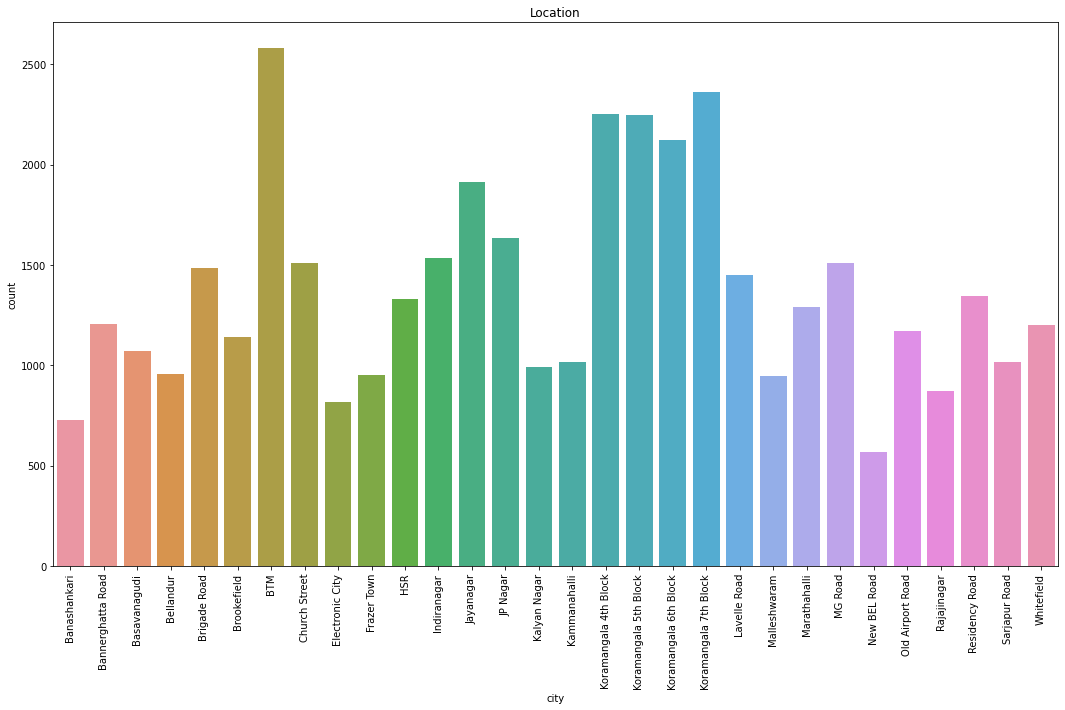

In [59]:
sns.countplot(zomato_data['city'])
sns.countplot(zomato_data['city']).set_xticklabels(sns.countplot(zomato_data['city']).get_xticklabels(), rotation = 90)
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.title('Location')

Here, we can see the count of restaurants in each city.

### Restaurant type:

In [60]:
zomato_data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [61]:
zomato_data['rest_type'].value_counts()

Quick Bites                   13871
Casual Dining                  9608
Cafe                           3368
Dessert Parlor                 1850
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

Text(0.5, 1.0, 'Restaurant type')

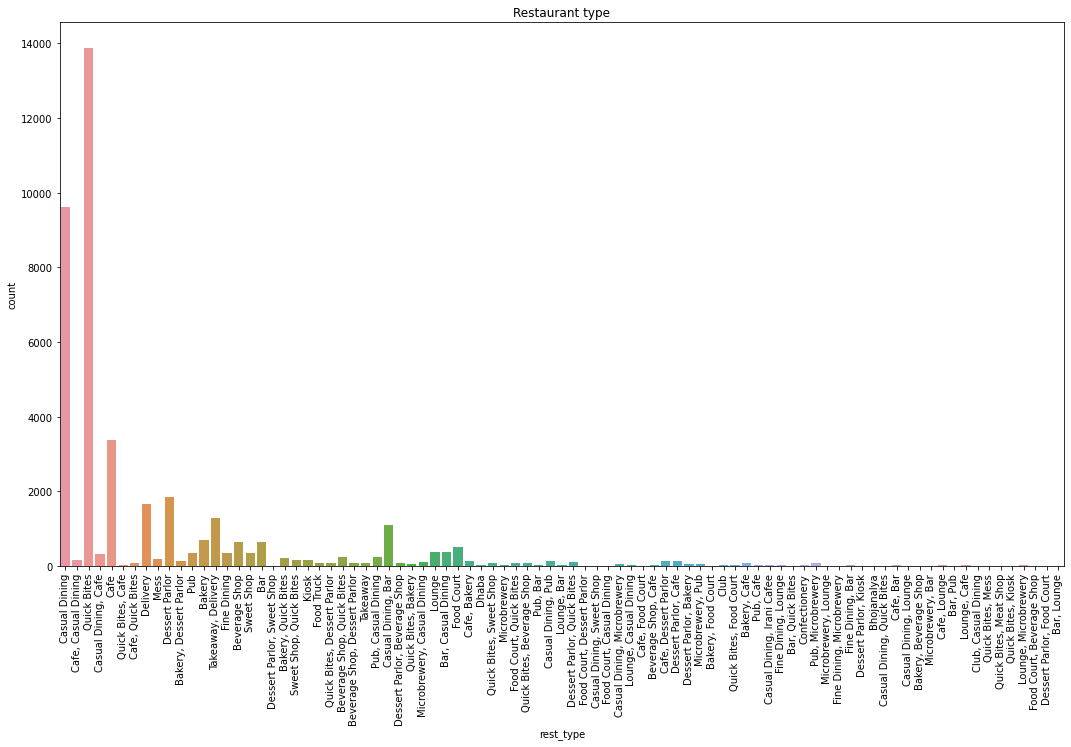

In [62]:
sns.countplot(zomato_data['rest_type'])
sns.countplot(zomato_data['rest_type']).set_xticklabels(sns.countplot(zomato_data['rest_type']).get_xticklabels(), rotation = 90)
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.title('Restaurant type')

### Types of services:

In [63]:
zomato_data['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [64]:
zomato_data['type'].value_counts()

Delivery              20431
Dine-out              14062
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  847
Pubs and bars           632
Name: type, dtype: int64

Text(0.5, 1.0, 'Types of services')

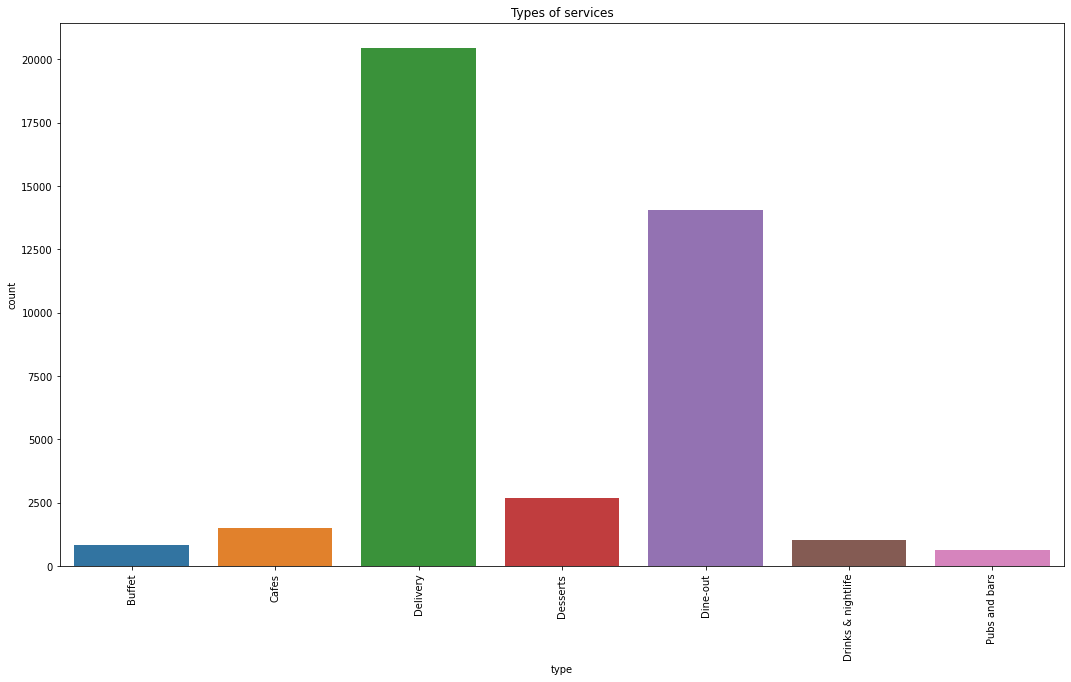

In [65]:
sns.countplot(zomato_data['type'])
sns.countplot(zomato_data['type']).set_xticklabels(sns.countplot(zomato_data['type']).get_xticklabels(), rotation = 90)
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.title('Types of services')

### Cost of restaurants:

In [66]:
zomato_data['cost'].unique()

array([8.41938883e-01, 3.15068493e-01, 6.31190727e-01, 7.36564805e-01,
       5.78503688e-01, 5.25816649e-01, 4.73129610e-01, 6.83877766e-01,
       4.20442571e-01, 9.47312961e-01, 2.09694415e-01, 7.89251844e-01,
       1.57007376e-01, 8.94625922e-01, 1.04320337e-01, 2.10748156e-04,
       3.67755532e-01, 2.62381454e-01, 1.00000000e+00, 0.00000000e+00,
       5.26870390e-04, 3.16122234e-04, 2.08640674e-01, 1.05374078e-04,
       6.32244468e-04, 2.41306639e-01, 1.35932561e-01, 7.37618546e-04,
       3.68809273e-04, 1.26448894e-03, 4.21496312e-04, 1.05374078e-03,
       8.42992624e-04, 9.48366702e-04, 1.88619600e-01, 3.46680717e-01,
       1.58061117e-03, 1.15911486e-03, 2.10748156e-03, 1.89673340e-03,
       2.52897787e-03, 5.16332982e-02, 4.10958904e-02, 2.63435195e-04,
       2.63435195e-03, 3.16122234e-03, 1.47523709e-03, 1.68598525e-03,
       4.74183351e-04, 7.27081138e-02, 2.31822972e-03, 2.51844046e-01,
       5.26870390e-03, 5.26870390e-05, 1.36986301e-03, 3.26659642e-03,
      

In [67]:
zomato_data['cost'].value_counts()

0.420443    5261
0.315068    5242
0.525817    4080
0.631191    3189
0.209694    3163
            ... 
0.003688       2
0.072708       1
0.004215       1
0.002845       1
0.083246       1
Name: cost, Length: 63, dtype: int64

Text(0.5, 1.0, 'Cost of restaurants')

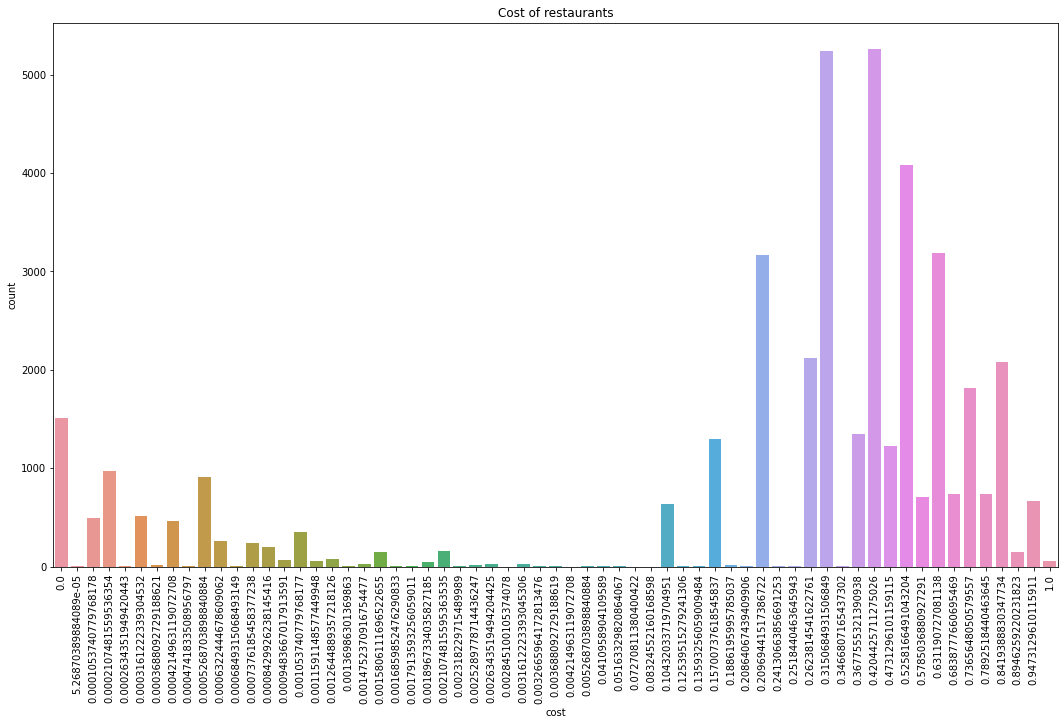

In [68]:
sns.countplot(zomato_data['cost'])
sns.countplot(zomato_data['cost']).set_xticklabels(sns.countplot(zomato_data['cost']).get_xticklabels(), rotation = 90)
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.title('Cost of restaurants')

### Most famous restaurants chains in Bengaluru:

In [69]:
zomato_data['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [70]:
zomato_data['name'].value_counts()

Cafe Coffee Day                   86
Onesta                            85
Empire Restaurant                 69
Kanti Sweets                      68
Five Star Chicken                 68
                                  ..
Daafoodies                         1
I Siri Restaurant And Caterers     1
The Foodware Veg                   1
Hotel Thalassery                   1
SeeYa Restaurant                   1
Name: name, Length: 6602, dtype: int64

Text(0.5, 0, 'Number of outlets')

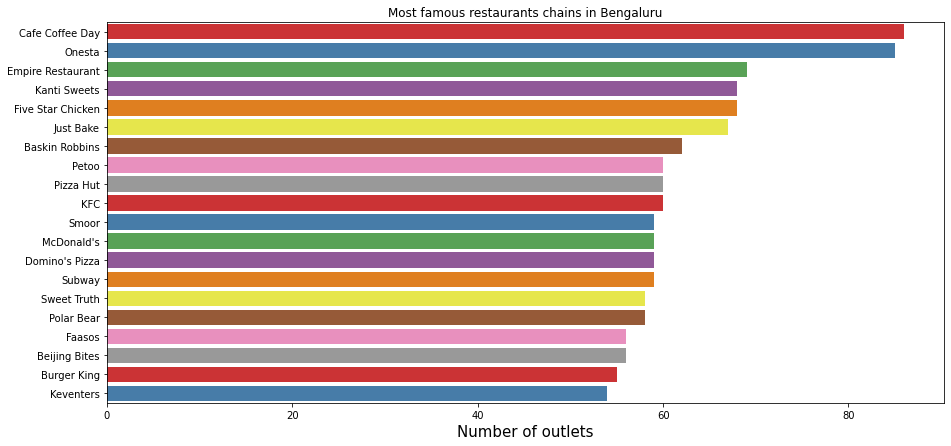

In [71]:
plt.figure(figsize = (15,7))
chains = zomato_data['name'].value_counts()[:20]
sns.barplot(x = chains, y = chains.index, palette = 'Set1')
plt.title("Most famous restaurants chains in Bengaluru")
plt.xlabel("Number of outlets", size = 15)